# Elizabeth Dautel
# Exam 1 
# Problem 4

a)
The Lokta-Volterra model for predator-prey relationships can be modified to have logistic like terms to predator-prey terms with the following equation adjustments.  Assume that the predator and prey are in a closed system such that there are no other species involved.
Here “N” is the prey, and  “P” is the predator, the two rate equations can be modeled.

dN/dt =r*N*(1-(N/K)-u*P/(x+N)) and dP/dt=s*P*(1-(P/(j*N))   

Where the growth of the prey population is limited by both the carrying capacity K, and by predation,  indicated by the u*P/(x+N) in equation 1.   (you can ignore units in these parameters and assume rates are all the same units and coefficients are adjusted to appropriate units)
Assuming r =0.4; K =900 ; u=2.5 ; x = 200; s =0.1 and j =0.5

PART A Using Euler in PYTHON/Vensim model the population of the predator/prey dynamics use a dt = 0.5, and begin with initial values of N = 25 (prey); and P =5 (predator). 


b) 
The Euler method for integration is used as a less precise way to model the relationship between predator and prey, which is defined by two differential equations which are affected by eachother. The population of prey is affected by the populaton of the predator and vice versa. The RK4 method is a more accurate tool for modeling the related differential equations. This model is assumed to be in a closed system with only the predator and prey of interest. no outside factors effect the relationship between predator and prey. 

In [34]:
import math as math
import numpy as np
import matplotlib.pyplot as plt

In [35]:
r=0.4 #define constants
k=900
u=2.5
x=200
s=0.1
j=0.5

tf=200 #define time parameters
t0=0
n=1000
dt=(tf-t0)/(n-1)
t=np.linspace(t0,tf,n)

dt=0.5 #define time step

N = np.zeros([n]) #create empty array for N and P values
P = np.zeros([n])

N[0]=25 #prey initial
P[0]=5  #predator initial

In [36]:
for i in range (1,n): #euler method for integration
    N[i]=dt*r*N[i-1]*(1-(N[i-1]/k)-(u*P[i-1]/(x+N[i-1])))+N[i-1]
    P[i]=dt*s*P[i-1]*(1-(P[i-1]/(j*N[i-1])))+P[i-1]                 

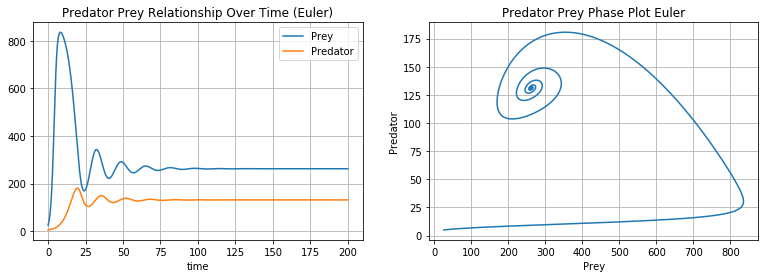

In [37]:
#predator prey over time
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(t,N,t,P)
plt.title('Predator Prey Relationship Over Time (Euler)')
plt.xlabel('time')
plt.legend(['Prey','Predator'])
plt.grid(True)
#predator prey phase plot
plt.subplot(1,2,2)
plt.plot(N,P)
plt.title('Predator Prey Phase Plot Euler')
plt.ylabel('Predator')
plt.xlabel('Prey')
plt.grid(True)



# Part B RK4 method

In [38]:
def rk4(r,t1,h): #rk4 method with 3rd order differential equation
    "Runge Kutta 4 Method"
    k1=h*f(r,t1)
    k2=h*f(r+0.5*k1,t1+0.5*h) 
    k3=h*f(r+0.5*k2,t1+0.5*h)  
    k4=h*f(r+k3,t1+h)
    return (k1+2*k2+2*k3+k4)/6

In [39]:
def f(r,t1): 
    rr=0.4 #define constants 
    k=900
    u=2.5
    x=200
    s=0.1
    j=0.5
    N1,P1 = r[0],r[1] #Predator and Prey array
    fN1dt = rr*N1*(1-(N1/k)-(u*(P1/(x+N1))))
    fP1dt = s*P1*(1-(P1/(j*N1)))    

    return np.array([fN1dt,fP1dt], float)

In [40]:
h=0.01
t1points=np.arange(0,200,h) #time points 
N1points,P1points =[],[] #predator prey points
r=np.array([25,5],float) 

for t1 in t1points:  
    N1points.append(r[0])
    P1points.append(r[1])
    r += rk4(r,t1,h) 

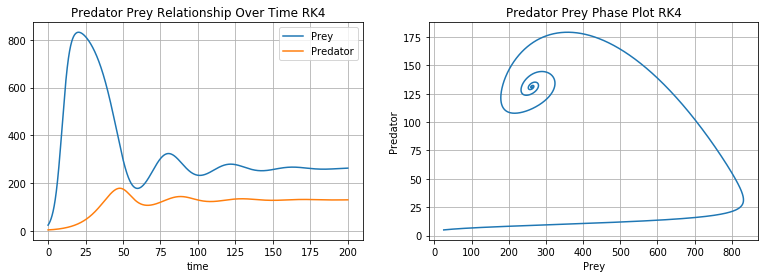

In [41]:
#predator prey over time RK4
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(t1points,N1points,t1points,P1points)
plt.title('Predator Prey Relationship Over Time RK4')
plt.xlabel('time')
plt.legend(['Prey','Predator'])
plt.grid(True)
#predator prey phase plot RK4
plt.subplot(1,2,2)
plt.plot(N1points,P1points)
plt.title('Predator Prey Phase Plot RK4')
plt.ylabel('Predator')
plt.xlabel('Prey')
plt.grid(True)

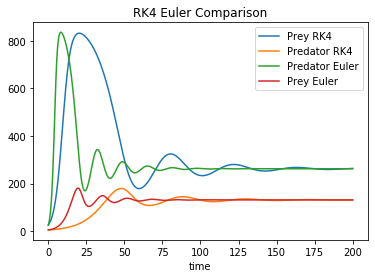

In [42]:
plt.plot(t1points,N1points,t1points,P1points,t,N,t,P)
plt.legend(['Prey RK4','Predator RK4','Predator Euler','Prey Euler'])
plt.title('RK4 Euler Comparison')
plt.xlabel('time')

plt.show()

d) e) The plot 'RK4 Euler Comparison' represents the differences produced from using the two different methods on the predator and prey equations. The RK4 method yields results that are similar to Euler method results but with a much larger frequency. The same relationship between predator and prey are observed, as the predator population increases the prey population is increasing very slowly. As the predator population drastically decreases the prey population reaches a maximim value. The RK4 method most likely produces the most accurate results because it shows a relationship change over a more realistic span of time. The phase plots for both methods show a periodic relationship between Predator and Prey, both methods yeild and almost identical phase plot.